In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'AMD'

mysql = Mysql()

In [3]:
mysql.update_candles(ticker, 60)

,t,o,l,h,c,v,r
t,,,,,,,
0,2020-03-26 20:00:00,47.250,47.5500,47.55,47.500,0.000000,2219327
1,2020-03-26 21:00:00,47.390,47.5500,47.45,47.550,0.000000,106266
2,2020-03-26 23:00:00,47.210,47.5500,47.55,47.340,0.000000,137683
0,2020-03-27 08:00:00,46.400,47.0900,46.52,46.700,0.000000,18585
1,2020-03-27 10:00:00,46.200,46.5700,46.38,46.480,-0.011043,25558
...,...,...,...,...,...,...,...
5,2021-03-26 16:00:00,76.660,77.3700,76.84,76.970,0.007816,6059655
6,2021-03-26 17:00:00,76.494,77.4778,76.65,76.845,0.001393,4020581
7,2021-03-26 18:00:00,75.030,76.9200,75.76,76.650,-0.007199,8979147


In [4]:
data = mysql.get_closes_by_symbol(ticker)

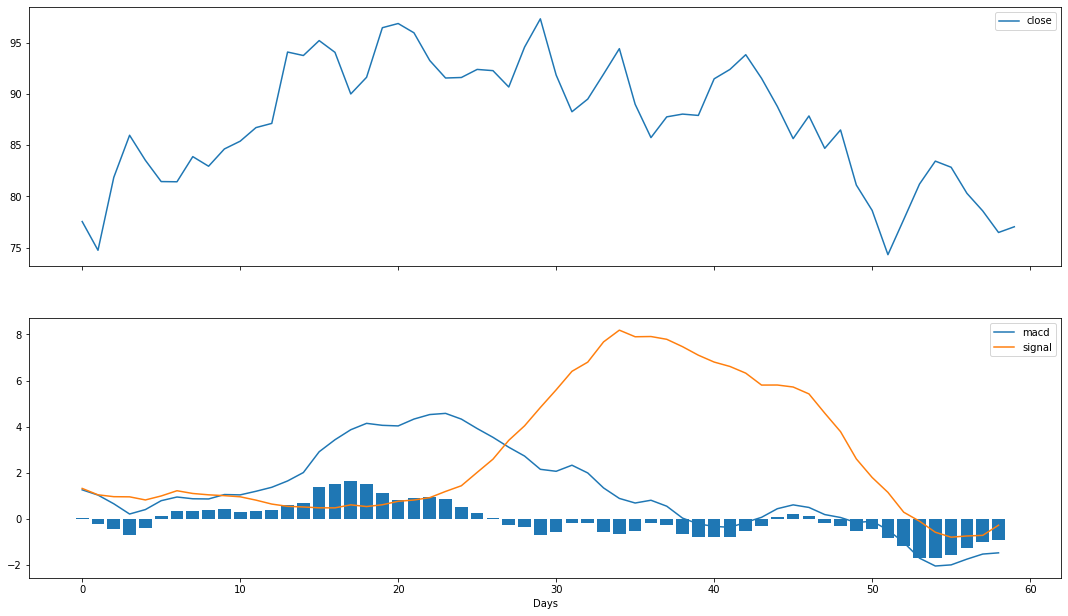

In [5]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

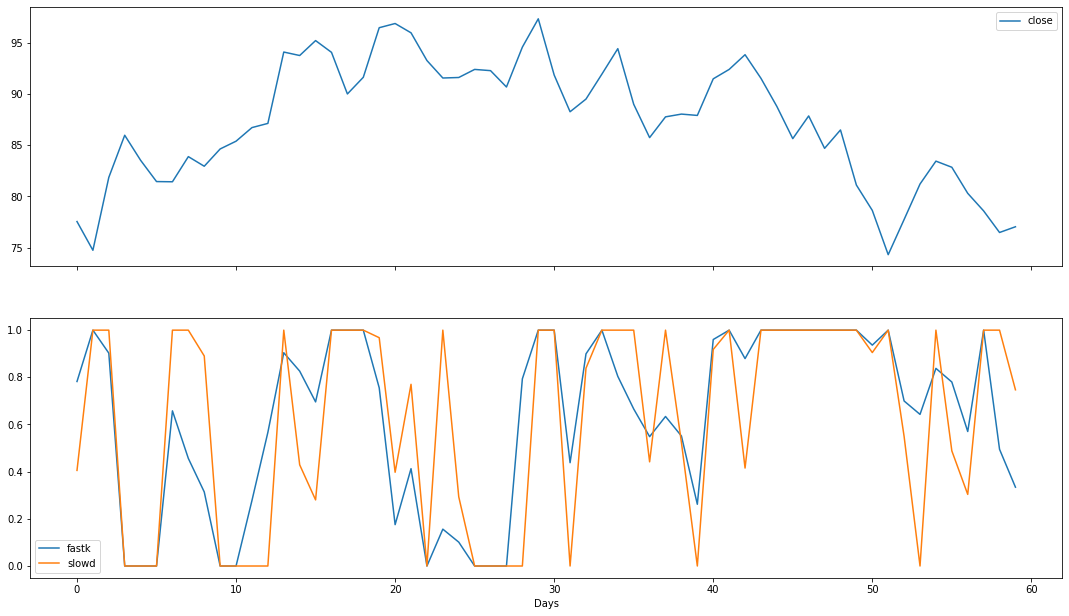

In [6]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)